# Checkin Analysis

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Set some Pandas options
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)

In [7]:
yelp_checkin=pd.read_csv('C:\\Users\\rohan\\challenge\\yelp_checkin.csv',sep=',')
yelp_checkin.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


In [9]:
#checkins exploration
df=yelp_checkin.groupby(['weekday','hour'])['checkins'].sum()
df=df.reset_index()
df=df.pivot(index='hour',columns='weekday')[['checkins']]
df.columns = df.columns.droplevel()
df=df.reset_index()
# Workaround for not being able to sort the values by hour
df.hour=df.hour.apply(lambda x: str(x).split(':')[0])
df.hour=df.hour.astype(int)
# Sort the hour column 
df=df.sort_values('hour')
df=df[['hour','Mon', 'Tue','Wed','Thu','Fri','Sat', 'Sun' ]]
# df=df.set_index('hour')
cm = sns.light_palette("orange", as_cmap=True)
df.head()

weekday,hour,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,0,163336,156195,166254,171669,178666,224425,225209
11,1,161168,162632,174696,181712,190371,245453,235295
16,2,140252,141732,153923,160906,169989,236195,224716
17,3,106422,103584,111840,117639,127783,189242,184979
18,4,73497,68950,72821,76283,86825,138952,140092


### Checkins Variations through the day

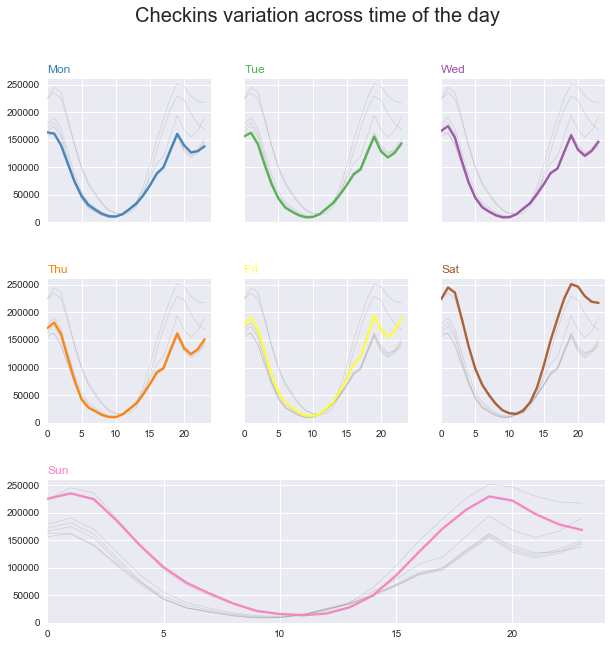

In [10]:
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

plt.style.use('seaborn-darkgrid')
# create a color palette
palette = plt.get_cmap('Set1')
plt.figure(figsize=(10,10))
plt.suptitle("Checkins variation across time of the day",fontsize=20)
gridspec.GridSpec(3,3)
plt.subplots_adjust(hspace=0.4)

# multiple line plot
num=0
for column in df.drop('hour', axis=1):
    num+=1
    # Find the right spot on the plot
    
    if num==7:  # adjustment to fit sunday
        plt.subplot2grid((3,3),(2,0),colspan=3)
    else:
        plt.subplot(3,3, num)
    
    # plot every groups, but discreet
    for v in df.drop('hour', axis=1):
        plt.plot(df['hour'], df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
    # Plot the lineplot
    plt.plot(df['hour'], df[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
    # Same limits for everybody!
    plt.xlim(0,24)
    plt.ylim(-2,260000)
    # Not ticks everywhere
    if num in range(4) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num))

### Checkins through the week

In [11]:
Checkin_analysis=df[['Mon','Tue','Wed','Thu','Fri','Sat','Sun']]

7 1925357 3291582


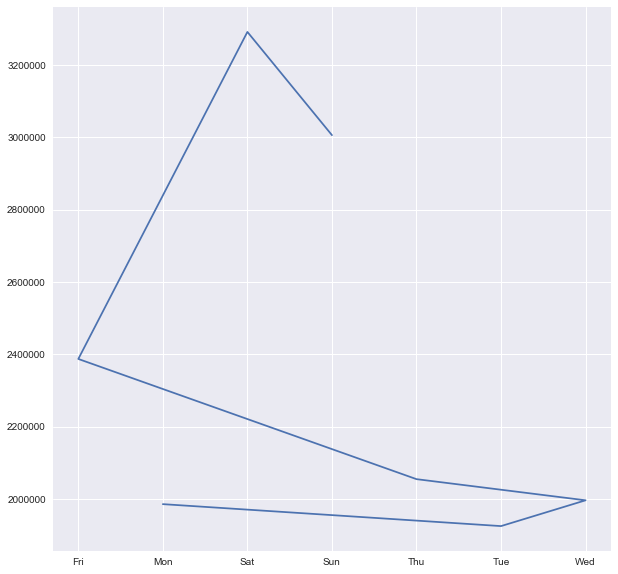

In [12]:
total_checkins = np.sum(Checkin_analysis, axis=0)  
                                       
print(len(total_checkins), min(total_checkins), max(total_checkins))
plt.figure(figsize=(10,10))
plt.plot(total_checkins)


### Kernel Density Estimator for the Checkins

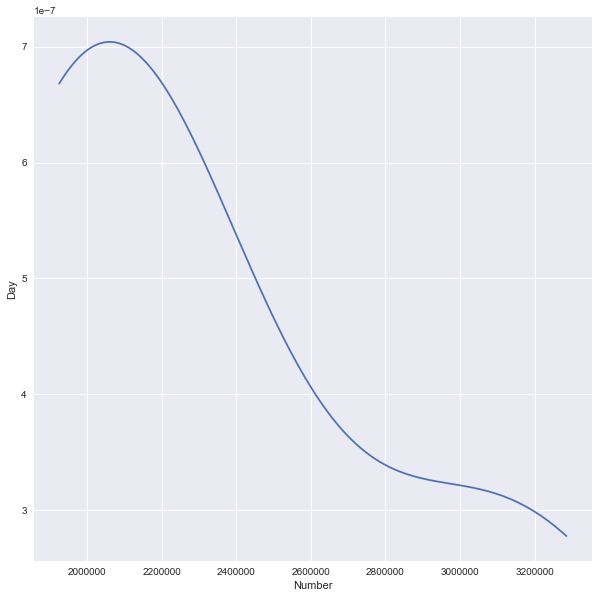

Count statistics:
  min:  1925357
  mean: 2378336.8571428573
  max:  3291582


In [13]:
from scipy import stats

# Use Gaussian smoothing to estimate the density
density = stats.kde.gaussian_kde(total_checkins)

# Make an x-axis for which to estimate the density, for plotting
x = np.arange(min(total_checkins), max(total_checkins), 10000)

# Draw the density plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x, density(x))
ax.set_xlabel("Number")
ax.set_ylabel("Day")

plt.show()

print(f'Count statistics:\n  min:  {np.min(total_checkins)}'
      f'\n  mean: {np.mean(total_checkins)}'
      f'\n  max:  {np.max(total_checkins)}')

### Maximum Likelihood Estimator for Saturday Checkins

In [1]:
from scipy.optimize import newton

In [2]:
from scipy.special import psi, polygamma

dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

In [14]:
df.head()

weekday,hour,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,0,163336,156195,166254,171669,178666,224425,225209
11,1,161168,162632,174696,181712,190371,245453,235295
16,2,140252,141732,153923,160906,169989,236195,224716
17,3,106422,103584,111840,117639,127783,189242,184979
18,4,73497,68950,72821,76283,86825,138952,140092


In [15]:
Sat_checkins=df.Sat

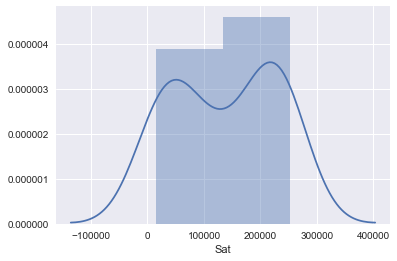

In [17]:
import seaborn as sns
sns.distplot(Sat_checkins)

In [18]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import pymc3 as pm
from sklearn.gaussian_process import GaussianProcess
from sklearn.cross_validation import train_test_split

C:\Users\rohan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
x_pred = Sat_checkins.values

In [25]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(x_pred, test_size=0.2)

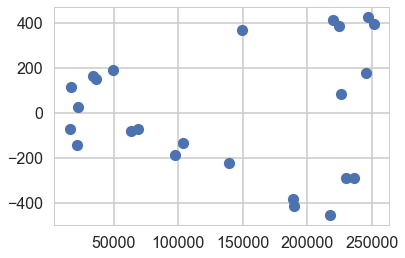

In [26]:
"""The function to predict."""
def f(x):
    return x**.5*np.sin(x)
plt.plot(x_pred, f(x_pred), 'o');

In [27]:
# Instantiate a Gaussian Process model
sigma_noise=0.4
noise = np.random.normal(0, sigma_noise, xtrain.shape[0])
ytrain = f(xtrain) + noise

NameError: name 'xtrain' is not defined